In [1]:
pip install PySastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 5.5 MB/s eta 0:00:00


In [29]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import sklearn
import keras
import pickle
import tensorflow.keras as keras
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import L1L2
from keras.optimizers import Adam, RMSprop, SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#from terbilang import Terbilang

# t = Terbilang()
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('all')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzi

True

In [3]:
#to print complete sentence
pd.options.display.max_colwidth = 500

In [4]:
#kamus
df1 = pd.read_csv('new_kamusalay.csv', encoding =  'ISO-8859-1', names=['old','new'])
df1.head()

,old,new
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [5]:
file_path = "train_preprocess.tsv.txt"
df = pd.read_csv(file_path, delimiter='\t', names=["Tweet", "Sentimen"])
#print(type(df["data"]))
#print(df["data"])

**DATA CLEASING**

In [6]:
def cleaning_data(text):
    text = text.lower()
    text=re.sub('url', '', text)
    text = re.sub('url\S+', '', text)
    text=re.sub('http', '', text)
    text = re.sub(r'http\S+', '', text)
    #text = re.sub(r'&', 'dan', text)
    #text=re.sub(r'/', 'atau', text)
    #text = re.sub(r'&amp', 'dan', text)
    #text = re.sub(r'&lt;', '', text)
    #text = re.sub(r'&gt;', '', text)
    text = re.sub(r'%', ' persen', text)
    text = re.sub(r' {2,}', ' ', text)
    text=re.sub(r'(\\x(.){2})', '', text) #emoticon
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    return text


**NLP PROCESS**

In [7]:
# Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = stemmer.stem(text)
    #text = [stemmer.stem(word) for word in text]
    return text

#Convert list of words into sentence
#def toSentence(list_words):
#    sentence = ' '.join(word for word in list_words)
#    return sentence

In [8]:
#split the data
def convert(lst):
    return ''.join(lst).split()

In [9]:
# check with kamus alay
def filter_data(text):
        result = ""
        tweets = text
        #print(tweets)
        temp=[]
        for tweet in tweets:
            try:
                trying = np.where(kamusalay['old']==tweet)[0][0]
                tweet = kamusalay['new'].iloc[trying]
            except:
                tweet = tweet
            #print(tweet)
            temp.append(tweet)
            result = result + " " + tweet
        return result

In [30]:
# Converting all the characters in a text into lower case
#def casefoldingText(text):
#    text = text.lower()
#    return text

# Tokenizing or splitting a string, text into a list of tokens
def tokenizingText(text):
    text = word_tokenize(text)
    return text

# Remove stopwors in a text
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

# Lemmatize the tokens
def lemmaText(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in text]
    return text

#Convert list of words into sentence
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence


In [31]:
df['ReviewTweet'] = df['Tweet'].apply(cleaning_data)
df['ReviewTweet']=df['ReviewTweet'].apply(convert)
df['ReviewTweet']=df['ReviewTweet'].apply(filter_data)
# df['ReviewTweet'] = df['ReviewTweet'].apply(stemmingText)

In [32]:
df['ReviewTweet']=df['ReviewTweet'].apply(tokenizingText)
df['ReviewTweet']=df['ReviewTweet'].apply(filteringText)
df['ReviewTweet']=df['ReviewTweet'].apply(toSentence)

In [33]:
df.head()

,Tweet,Sentimen,ReviewTweet
0,"warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !",positive,warung dimiliki pengusaha pabrik puluhan terkenal putih bandung berkualitas dipadu keahlian memasak dipadu kretivitas warung menyajikan menu utama berbahan ditambah menu ayam selera indonesia harga terjangkau lewatkan bletoka nya kalah asli tegal
1,mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah-pecah,neutral,mohon ulama lurus k212 mmbri hujjah partai diwlh suara islam pecah pecah
2,"lokasi strategis di jalan sumatera bandung . tempat nya nyaman terutama sofa di lantai 2 . paella nya enak , sangat pas dimakan dengan minum bir dingin . appetiser nya juga enak-enak .",positive,lokasi strategis jalan sumatera bandung nya nyaman sofa lantai 2 paella nya enak pas dimakan minum bir dingin appetiser nya enak enak
3,betapa bahagia nya diri ini saat unboxing paket dan barang nya bagus ! menetapkan beli lagi !,positive,betapa bahagia nya unboxing paket barang nya bagus menetapkan beli
4,"duh . jadi mahasiswa jangan sombong dong . kasih kartu kuning segala . belajar dulu yang baik , tidak usahlah ikut-ikut politik . nanti sudah selesai kuliah nya mau ikut politik juga tidak telat . dasar mahasiswa .",negative,duh mahasiswa sombong kasih kartu kuning belajar usahlah politik selesai kuliah nya politik telat dasar mahasiswa


In [12]:
#classes = df['Sentimen']
#x = df['ReviewTweet'].tolist()


In [13]:
# Split the data (with composition data train 80%, data test 20%)
# Random state add
#X_train, X_test, y_train, y_test = train_test_split(x, classes, test_size = 0.2, random_state = 42)
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)



In [14]:
#use TFIDF (TF-IDF)
#data_preprocessed1 = X_train, X_test, y_train, y_test

#vectorizerr = TfidfVectorizer()
#vectorizerr.fit(data_preprocessed1)

#X = vectorizerr.transform(data_preprocessed1)

In [34]:
#use TFIDF (TF-IDF)
data_preprocessed1 = df['ReviewTweet'].tolist()

vectorizerr = TfidfVectorizer(ngram_range = (1,1))
vectorizerr.fit(data_preprocessed1)

X = vectorizerr.transform(data_preprocessed1)
X.toarray()[0].shape

(16695,)

In [35]:
#to save the model
pickle.dump(vectorizerr, open('featureTFsatusatu.p','wb'))

In [36]:
classes = df['Sentimen']

In [37]:
# Split the data (with composition data train 80%, data test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, classes, test_size = 0.2)
print(X_train)
# print(X_test.shape, y_test.shape)

  (0, 2543)	1.0
  (1, 15016)	0.44141395569118774
  (1, 14399)	0.45086655727176955
  (1, 13972)	0.2408888900324202
  (1, 13414)	0.3974851453236294
  (1, 10780)	0.08165973730513919
  (1, 9486)	0.27316441746071835
  (1, 8590)	0.1246369178703405
  (1, 7460)	0.36343390424750577
  (1, 5737)	0.14455744549373895
  (1, 5604)	0.3104656081938578
  (1, 5478)	0.19914754461429734
  (2, 16132)	0.34453607973349665
  (2, 15691)	0.22323224435672553
  (2, 8117)	0.27479046944278485
  (2, 5786)	0.6600066741666343
  (2, 3777)	0.33000333708331714
  (2, 3414)	0.19383084138184725
  (2, 2155)	0.29484830442392307
  (2, 937)	0.29484830442392307
  (3, 15124)	0.19384268702607377
  (3, 14647)	0.18040124979006344
  (3, 14496)	0.35112580992591813
  (3, 13972)	0.22467598551185106
  (3, 11601)	0.28956987795951616
  :	:
  (8798, 7822)	0.12876296435942444
  (8798, 7513)	0.2217112282915645
  (8798, 7220)	0.17273390154432494
  (8798, 4595)	0.1569451556278248
  (8798, 2056)	0.18168834974892373
  (8798, 1259)	0.19924362770602

In [38]:
model = MLPClassifier(learning_rate='constant', learning_rate_init=0.001)
model = model.fit(X_train, y_train)

In [39]:
#to save the model
pickle.dump(model, open('model-sentimentTFIDF.p','wb'))

In [40]:
test = model.predict(X_test)

print(classification_report(y_test, test))

              precision    recall  f1-score   support

    negative       0.71      0.74      0.73       693
     neutral       0.81      0.52      0.63       244
    positive       0.85      0.88      0.87      1263

    accuracy                           0.80      2200
   macro avg       0.79      0.72      0.74      2200
weighted avg       0.80      0.80      0.80      2200



In [41]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

accuracies = []


for iteration, data1 in enumerate(kf.split(X), start=1):
  data_train = X[data1[0]]
  target_train = classes[data1[0]]

  data_test = X[data1[1]]
  target_test = classes[data1[1]]

  clf = MLPClassifier(learning_rate='constant', learning_rate_init=0.001)
  clf.fit(data_train, target_train)

  preds = clf.predict(data_test)

  accuracy = accuracy_score(target_test, preds)

  print("Training ke-", iteration)
  print(classification_report(target_test, preds))
  print("_______________________________________")

  accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Average accuracy :", average_accuracy)

Training ke- 1
              precision    recall  f1-score   support

    negative       0.71      0.74      0.72       680
     neutral       0.78      0.52      0.62       239
    positive       0.84      0.88      0.86      1281

    accuracy                           0.80      2200
   macro avg       0.78      0.71      0.74      2200
weighted avg       0.80      0.80      0.79      2200

_______________________________________
Training ke- 2
              precision    recall  f1-score   support

    negative       0.71      0.75      0.73       706
     neutral       0.78      0.56      0.65       220
    positive       0.85      0.87      0.86      1274

    accuracy                           0.80      2200
   macro avg       0.78      0.73      0.75      2200
weighted avg       0.80      0.80      0.80      2200

_______________________________________
Training ke- 3
              precision    recall  f1-score   support

    negative       0.73      0.73      0.73       682
    

In [44]:
# prediction
original_text =  '''
saya suka makan di restoran itu karena makanannya enak enak
'''

# Feature Extraction
text = vectorizerr.transform([cleaning_data(original_text)])

#print(text) #0, 14410

# predict the sentiment
result = model.predict(text)[0]
print("Sentiment:")
print()
print(result)


Sentiment:

positive


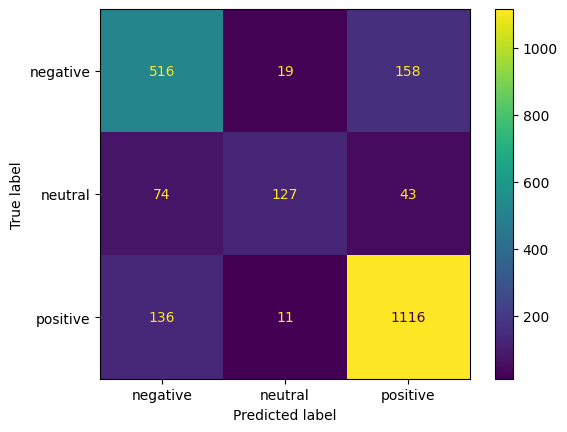

In [45]:
cm = confusion_matrix(y_test, test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()